In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
right_foot_files = [
    'Avaliações - Physics - 18-06/Pé direito/Marcha normal/Avaliação 1 - Pé direito - Marcha Normal.csv',
    'Avaliações - Physics - 18-06/Pé direito/Marcha normal/Avaliação 2 - Pé direito - Marcha Normal.csv',
    'Avaliações - Physics - 18-06/Pé direito/Marcha normal/Avaliação 3 - Pé Direito - Marcha normal.csv',
    'Avaliações - Physics - 18-06/Pé direito/Marcha rápida/Avaliação 4 - Pé direito - Marcha rápida.csv',
    'Avaliações - Physics - 18-06/Pé direito/Marcha rápida/Avaliação 5 - Pé direito - Marcha rápida.csv',
    'Avaliações - Physics - 18-06/Pé direito/Marcha rápida/Avaliação 6 - Pé direito - Marcha rápida.csv',
    'Avaliações - Physics - 18-06/Pé direito/Marcha lenta/Avaliação 7 - Pé direito - Marcha lenta.csv',
    'Avaliações - Physics - 18-06/Pé direito/Marcha lenta/Avaliação 8 - Pé direito - Marcha lenta.csv',
    'Avaliações - Physics - 18-06/Pé direito/Marcha lenta/Avaliação 9 - Pé direito - Marcha lenta.csv'
]

left_foot_files = [
    'Avaliações - Physics - 18-06/Pé esquerdo/Marcha normal/Avaliação 1 - Pé esquerdo - Marcha normal.csv',
    'Avaliações - Physics - 18-06/Pé esquerdo/Marcha normal/Avaliação 2 - Pé esquerdo - Marcha mormal.csv',
    'Avaliações - Physics - 18-06/Pé esquerdo/Marcha normal/Avaliação 3 - Pé esquerdo - Marcha normal.csv',
    'Avaliações - Physics - 18-06/Pé esquerdo/Marcha rápida/Avaliação 4 - Pé esquerdo - Marcha rápida.csv',
    'Avaliações - Physics - 18-06/Pé esquerdo/Marcha rápida/Avaliação 5 - Pé esquerdo - Marcha rápida.csv',
    'Avaliações - Physics - 18-06/Pé esquerdo/Marcha rápida/Avaliação 6 - Pé esquerdo - Marcha rápida.csv',
    'Avaliações - Physics - 18-06/Pé esquerdo/Marcha lenta/Avaliação 7 - Pé esquerdo - Marcha lenta.csv',
    'Avaliações - Physics - 18-06/Pé esquerdo/Marcha lenta/Avaliação 8 - Pé esquerdo - Marcha lenta.csv',
    'Avaliações - Physics - 18-06/Pé esquerdo/Marcha lenta/Avaliação 9 - Pé esquerdo - Marcha lenta.csv'
]

In [25]:
def analyze_sampling_rate(file_path, sep=','):
    data = pd.read_csv(file_path, sep=sep)
    data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S:%f')

    data['second'] = data['time'].dt.floor('S')
    
    sample_rate_per_second = data.groupby('second').size()
    
    return sample_rate_per_second

In [26]:
def plot_sampling_rate(sample_rate_per_second):
    plt.figure(figsize=(12, 6))
    sample_rate_per_second.plot(kind='bar')
    plt.title('Taxa de Amostragem por Segundo')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Frequência de Amostragem')
    plt.xticks(rotation=45) 
    plt.grid(True)
    plt.show()

In [33]:
def plot_sampling_rate2(sample_rate_per_second_sensor1, sample_rate_per_second_sensor2):
    plt.figure(figsize=(14, 7))
    sample_rate_per_second_sensor1.plot(kind='bar', color='blue', alpha=0.6, label='Pé direito')
    
    sample_rate_per_second_sensor2.plot(kind='bar', color='red', alpha=0.6, label='Pé esquerdo')
    
    plt.title('Taxa de Amostragem por Segundo')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Frequência de Amostragem')
    plt.xticks(rotation=45) 
    plt.grid(True)
    plt.legend()
    plt.show()

## Analiza a taxa de amostragem bruta de cada sensor

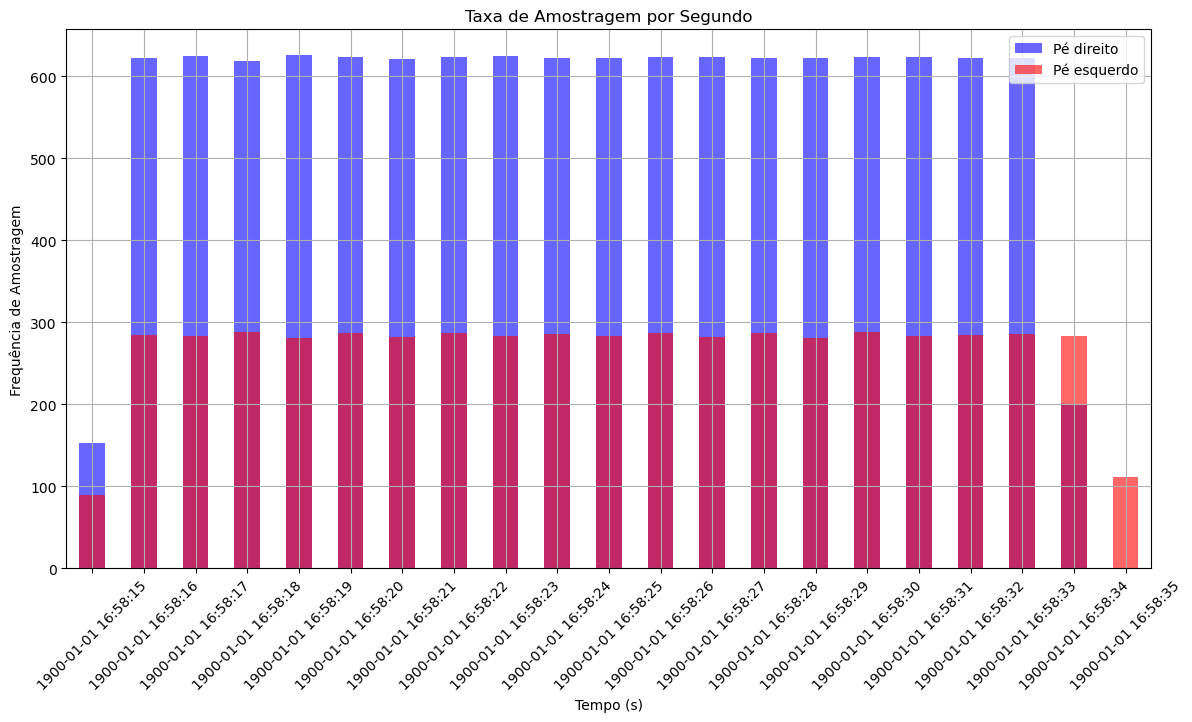

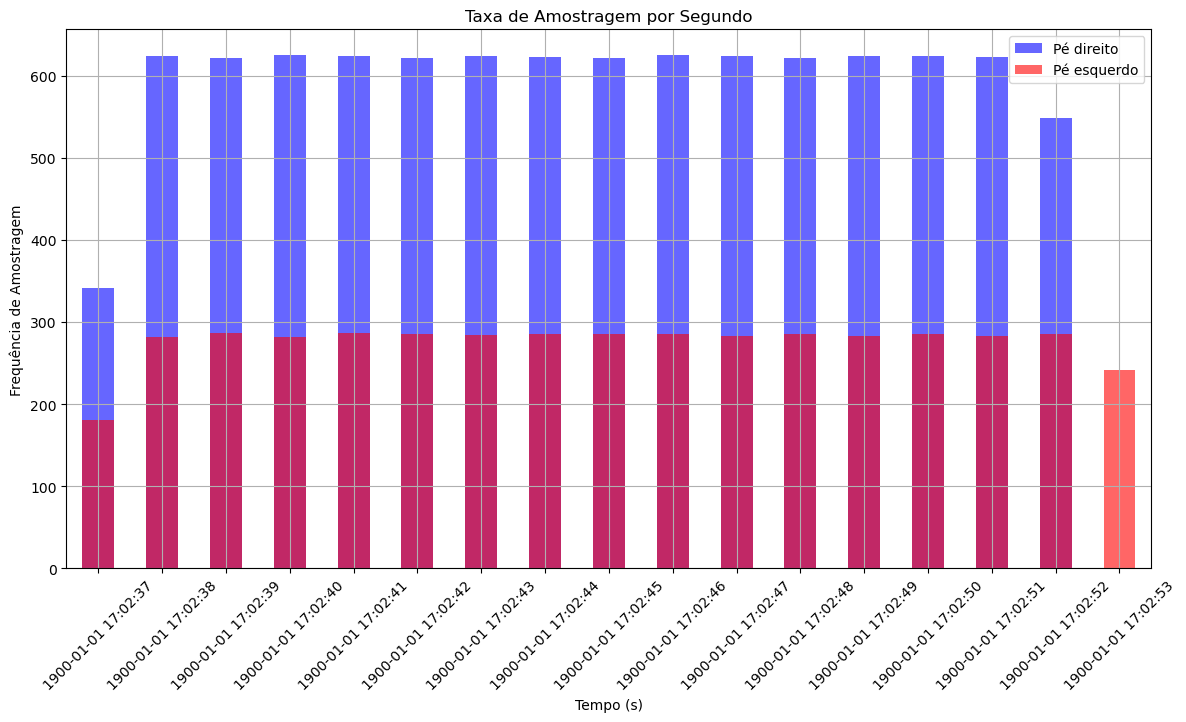

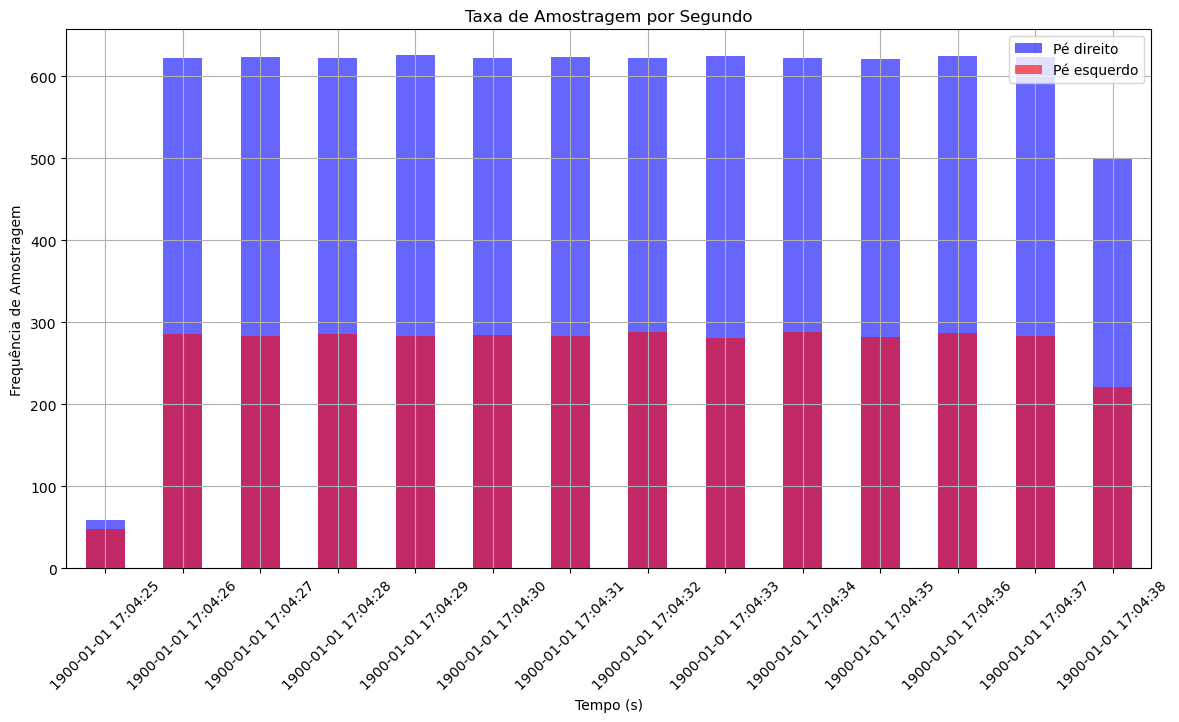

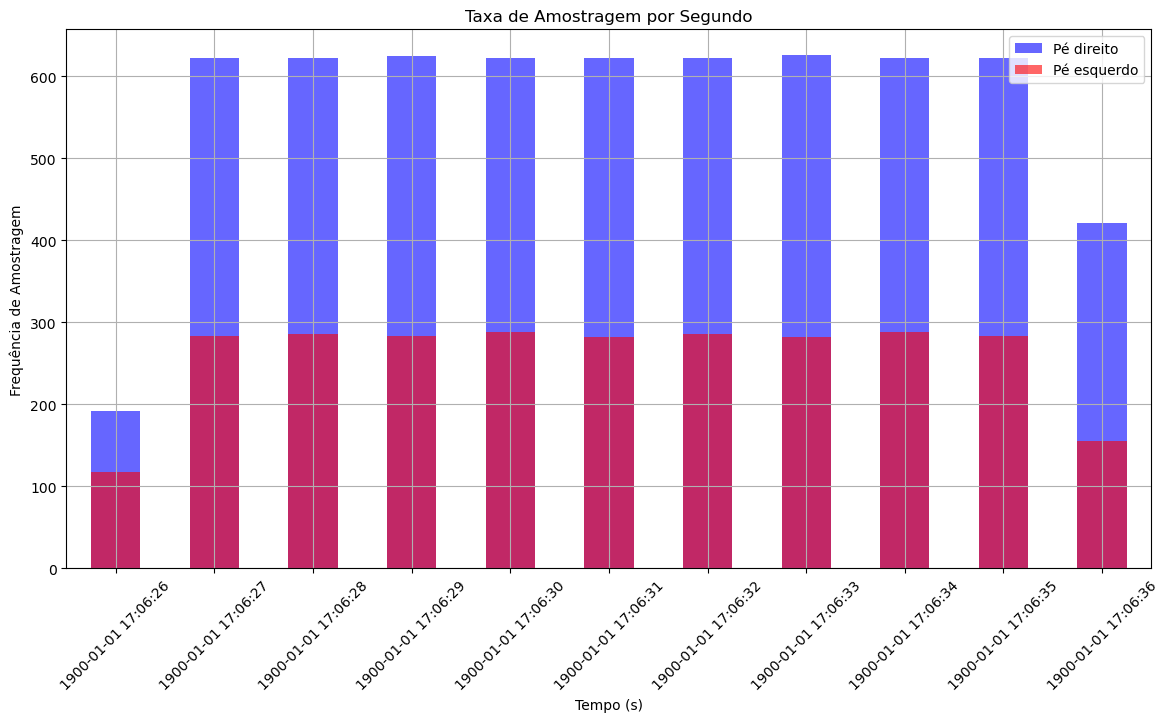

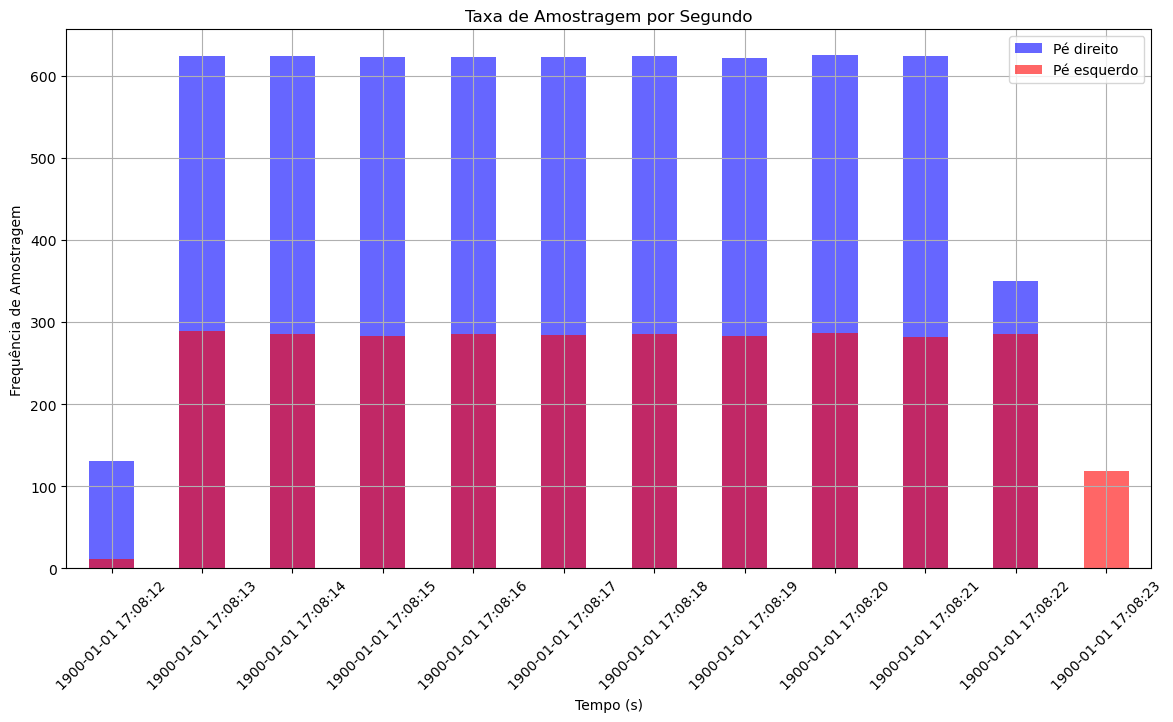

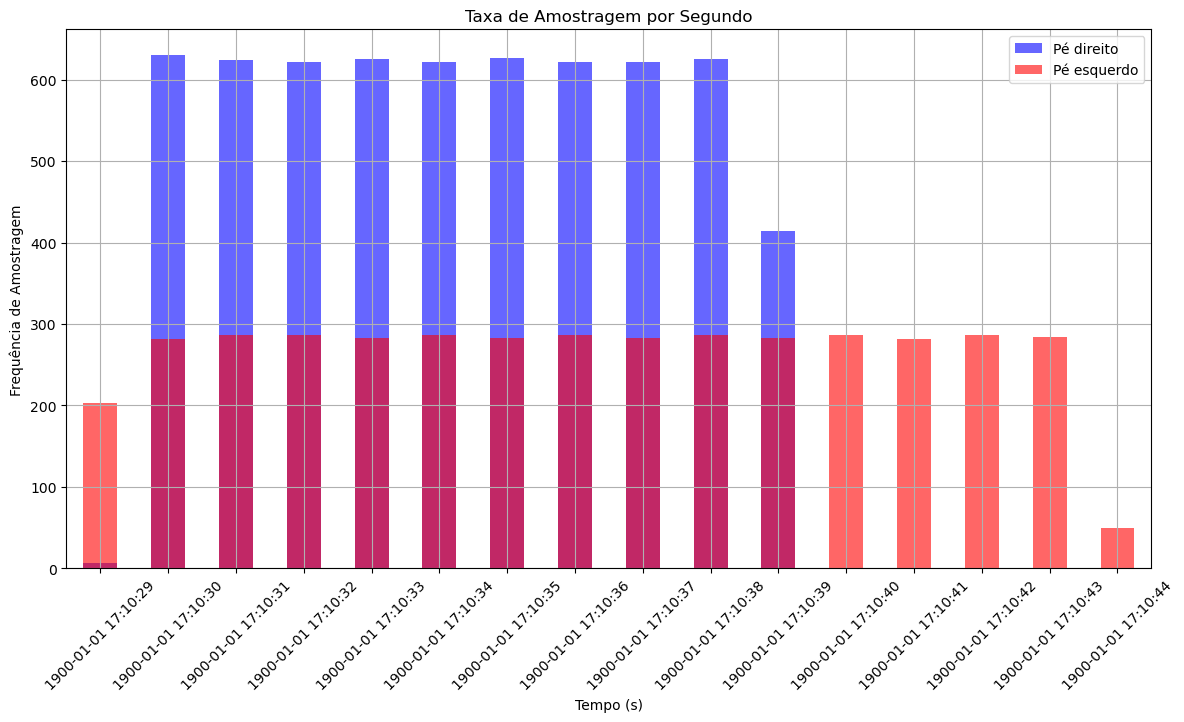

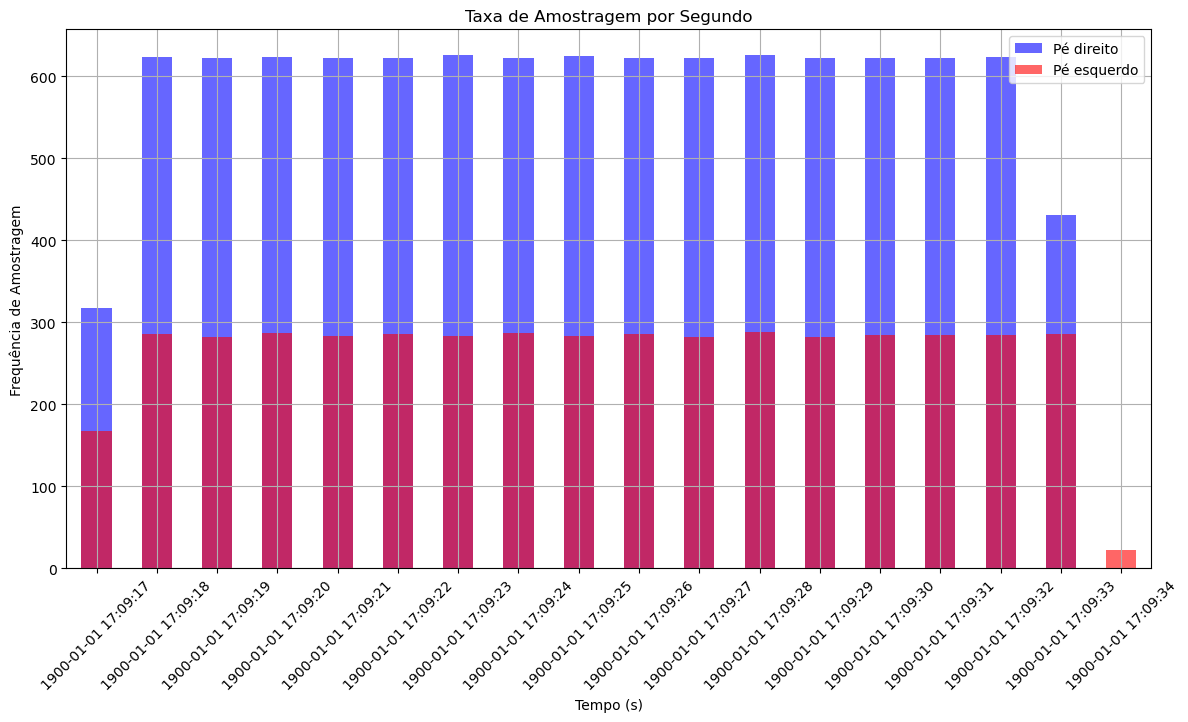

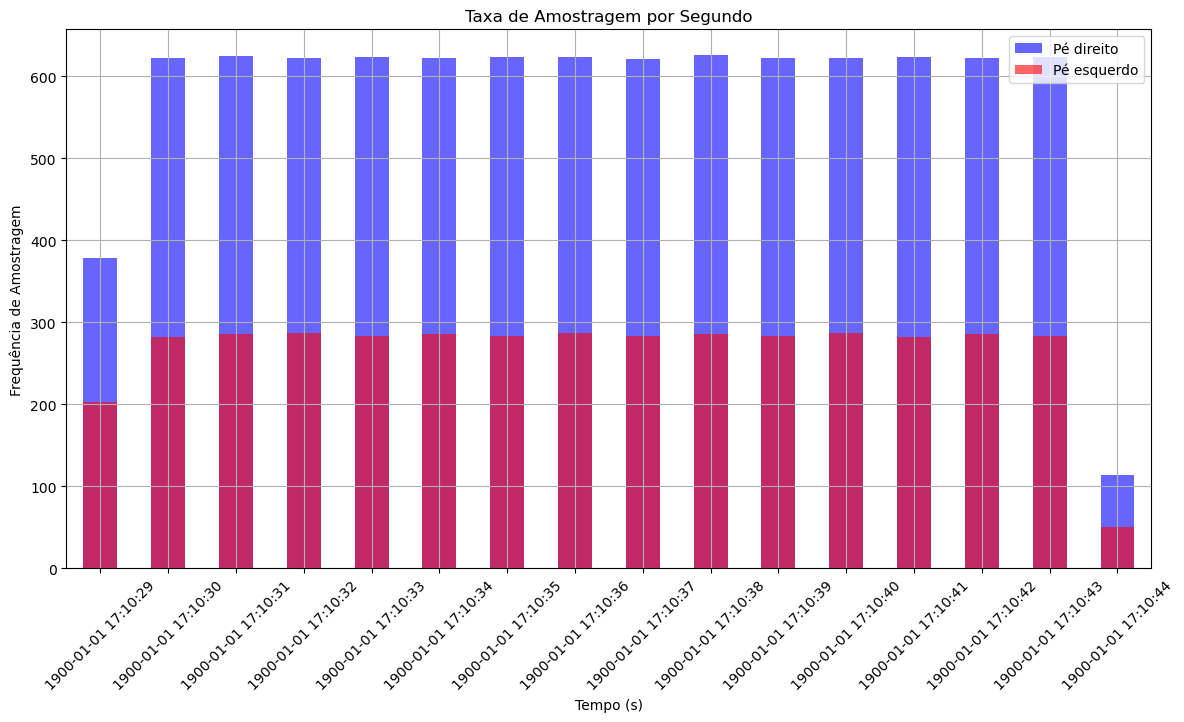

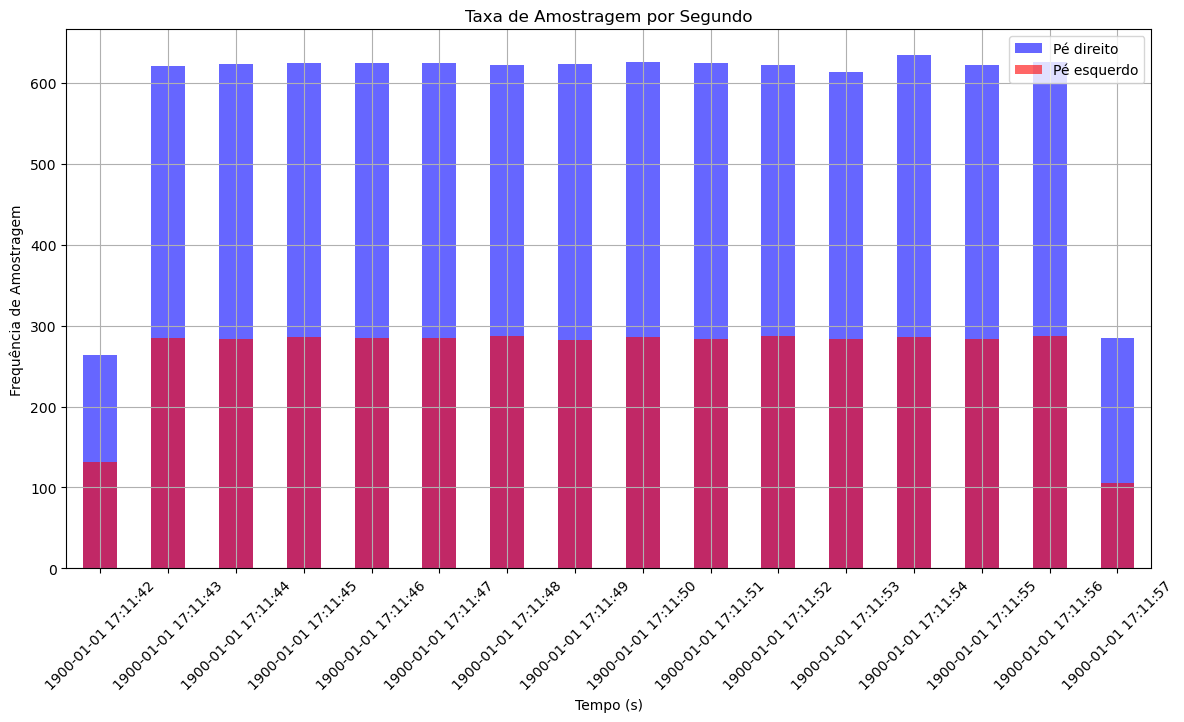

In [34]:
for right_file, left_file in zip(right_foot_files, left_foot_files):
    right_sample_rate = analyze_sampling_rate(right_file)
    left_sample_rate = analyze_sampling_rate(left_file, sep=';')
    plot_sampling_rate2(right_sample_rate, left_sample_rate)

## Interpolação de dados

In [29]:
def normalize_sampling_rate(file_path, sep=',', target_freq=256):
    data = pd.read_csv(file_path, sep=sep)
    
    data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S:%f')
    
    data['second'] = data['time'].dt.floor('S')  
    
    normalized_data_frames = []
    
    for _, group in data.groupby('second'):
        if len(group) > target_freq:
           
            sampled_group = group.sample(n=target_freq)
        else:
            
            sampled_group = group
        normalized_data_frames.append(sampled_group)
    
    
    normalized_data = pd.concat(normalized_data_frames)
    
    
    normalized_data.sort_values('time', inplace=True)
    
    return normalized_data

In [30]:
def analyze_interpoled_sampling_rate(data, sep=','):
    data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S:%f')

    data['second'] = data['time'].dt.floor('S')
    
    sample_rate_per_second = data.groupby('second').size()
    
    return sample_rate_per_second

In [31]:
# resampled_foot1 = normalize_sampling_rate(right_foot_files[0])
# resampled_foot1.head()
# new_rate = analyze_interpoled_sampling_rate(resampled_foot1)
# plot_sampling_rate(new_rate)

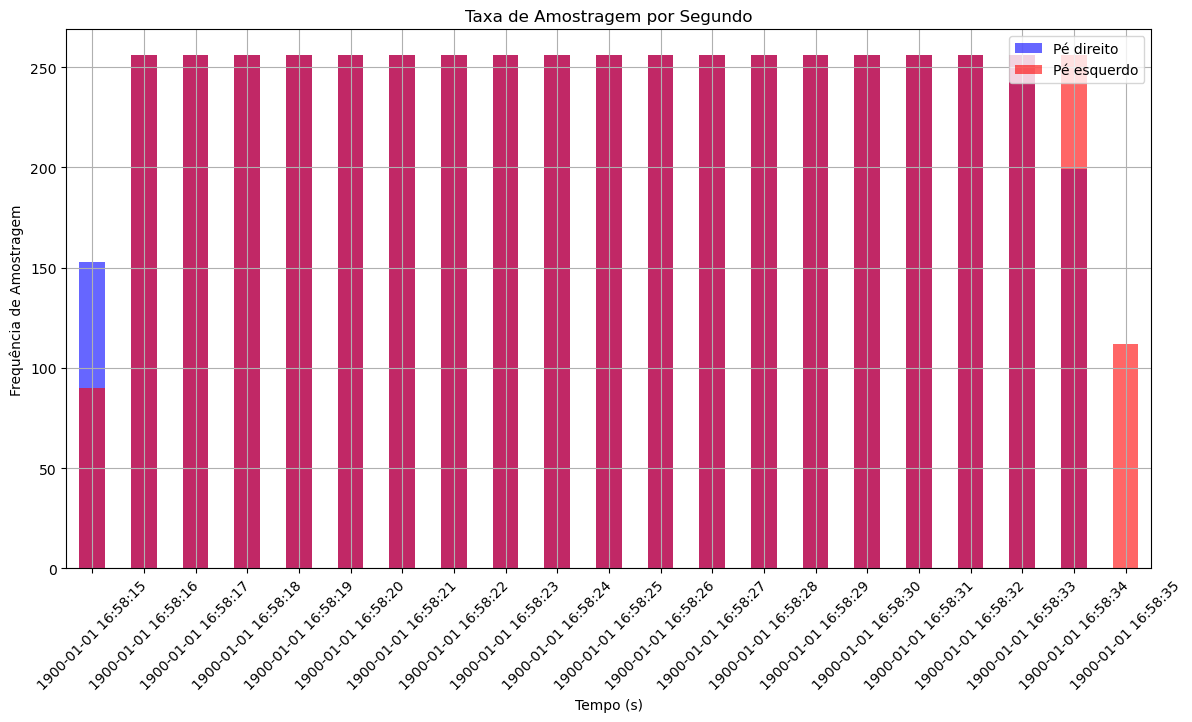

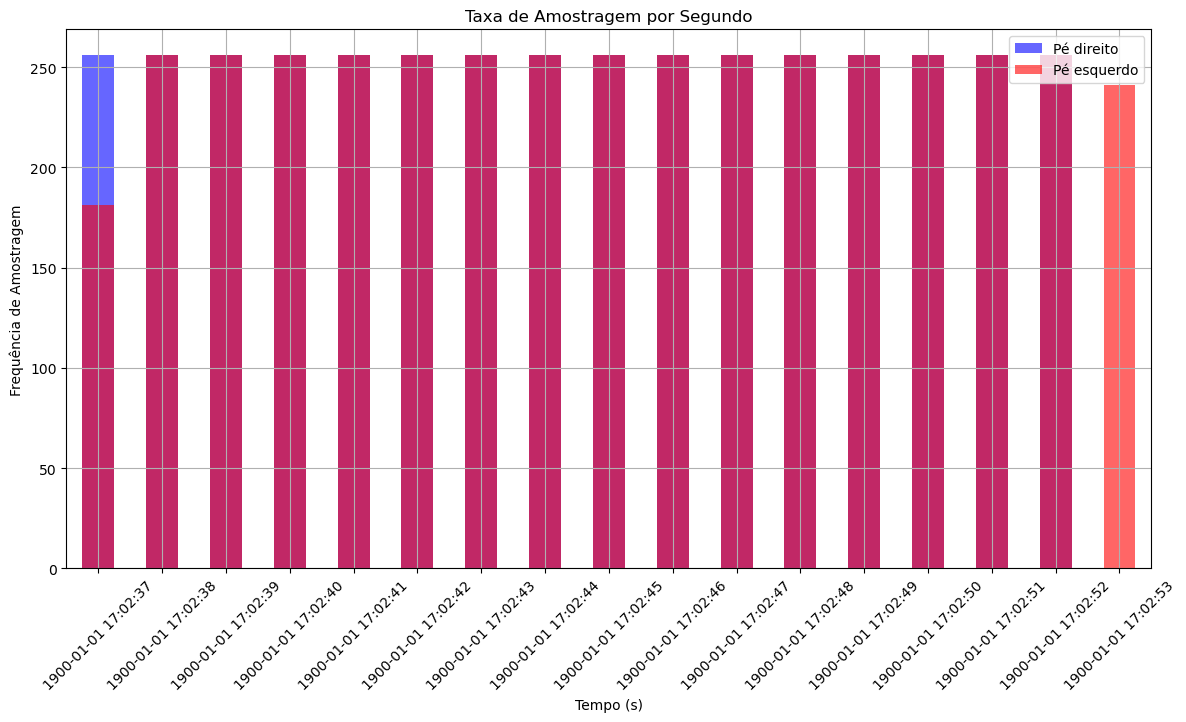

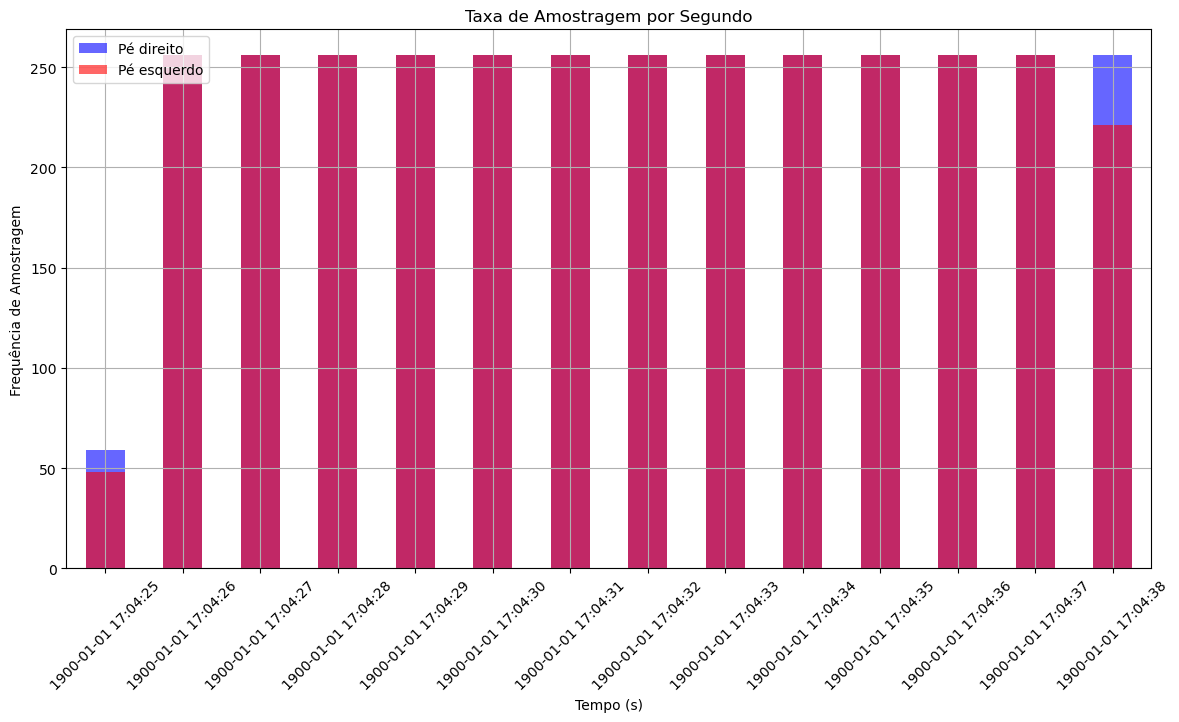

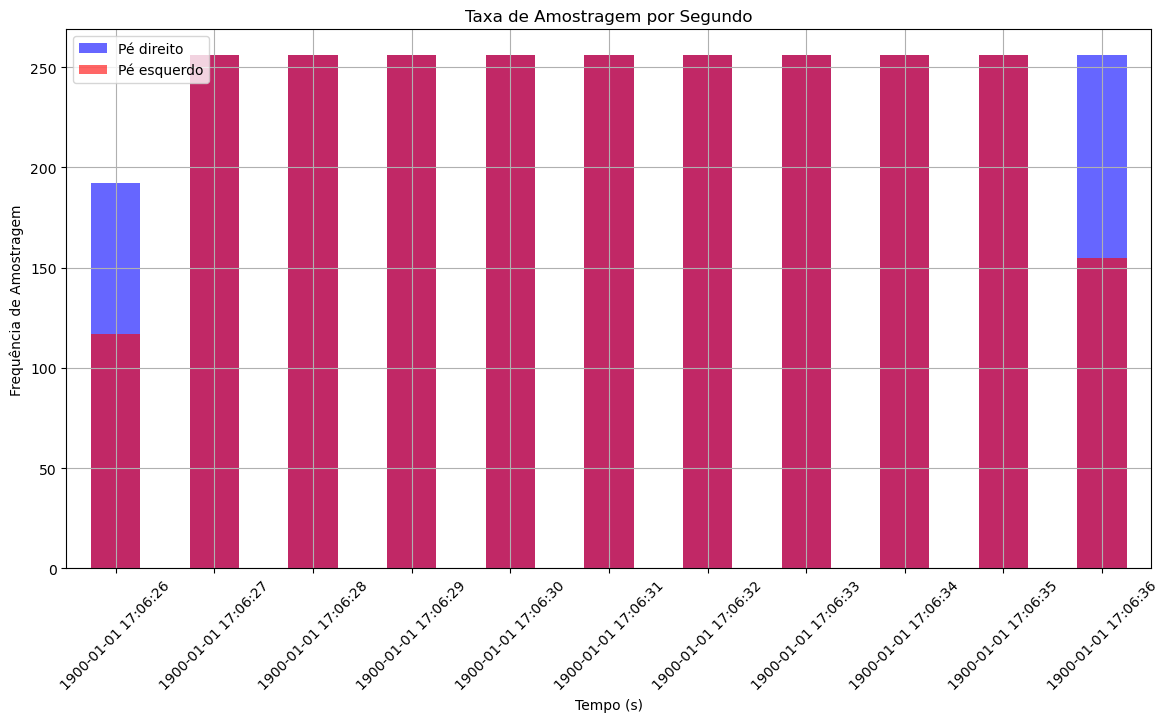

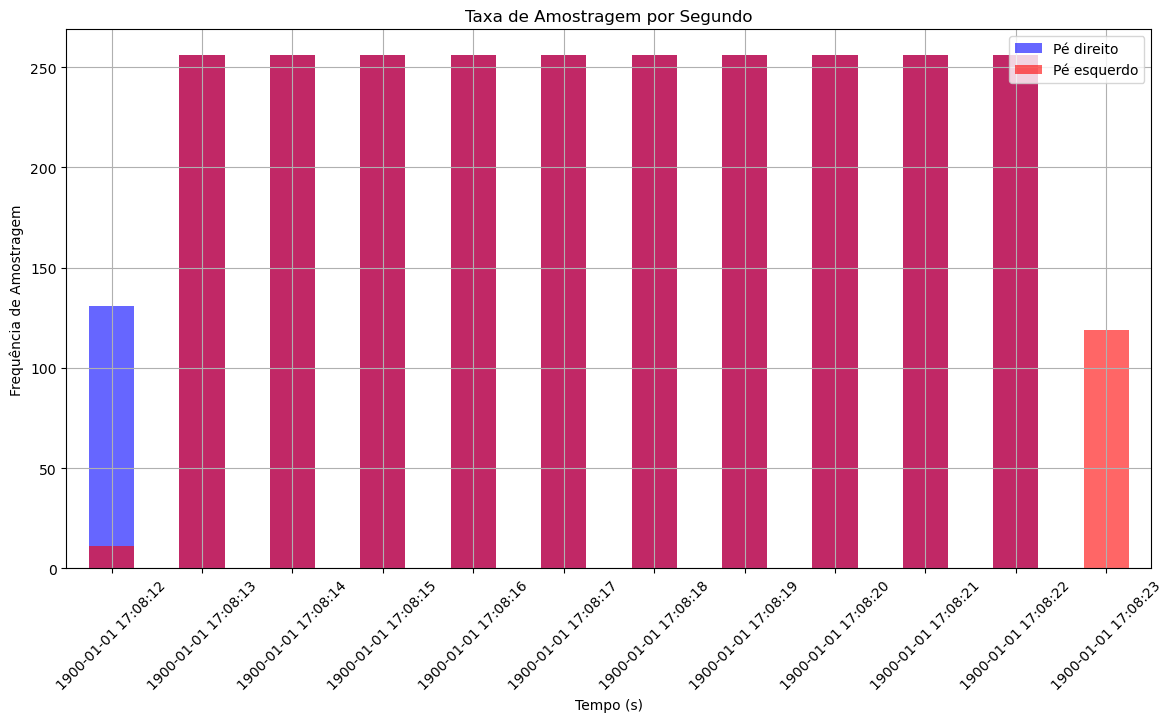

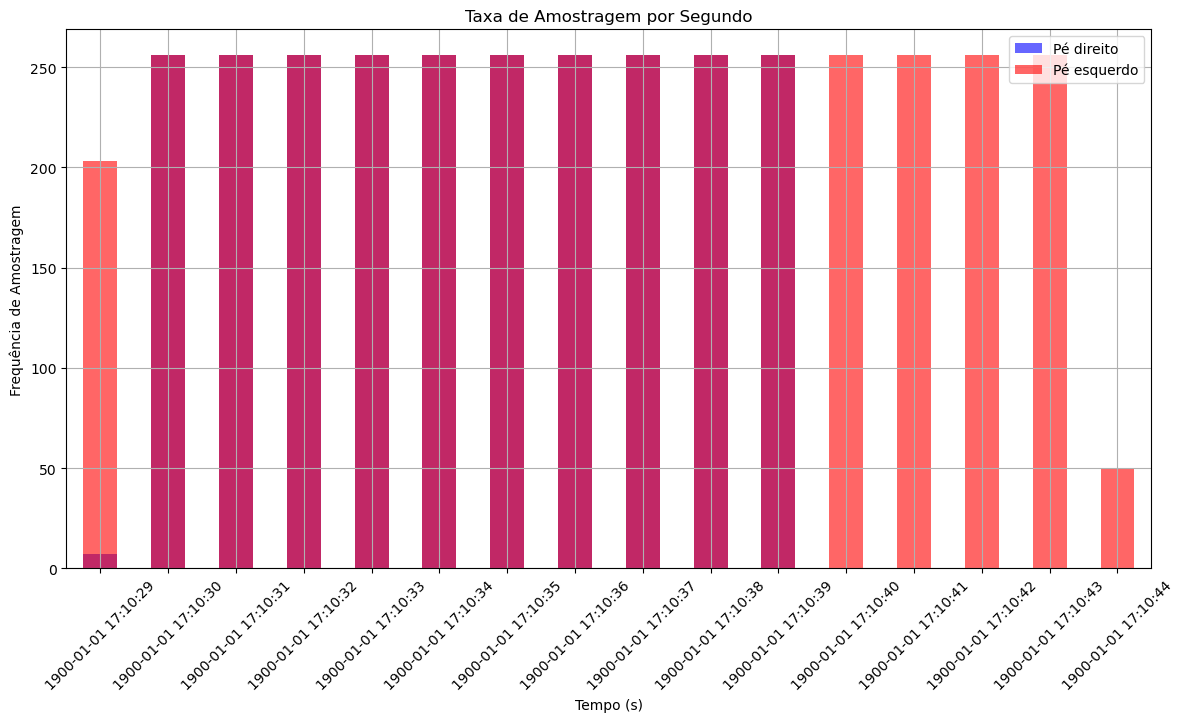

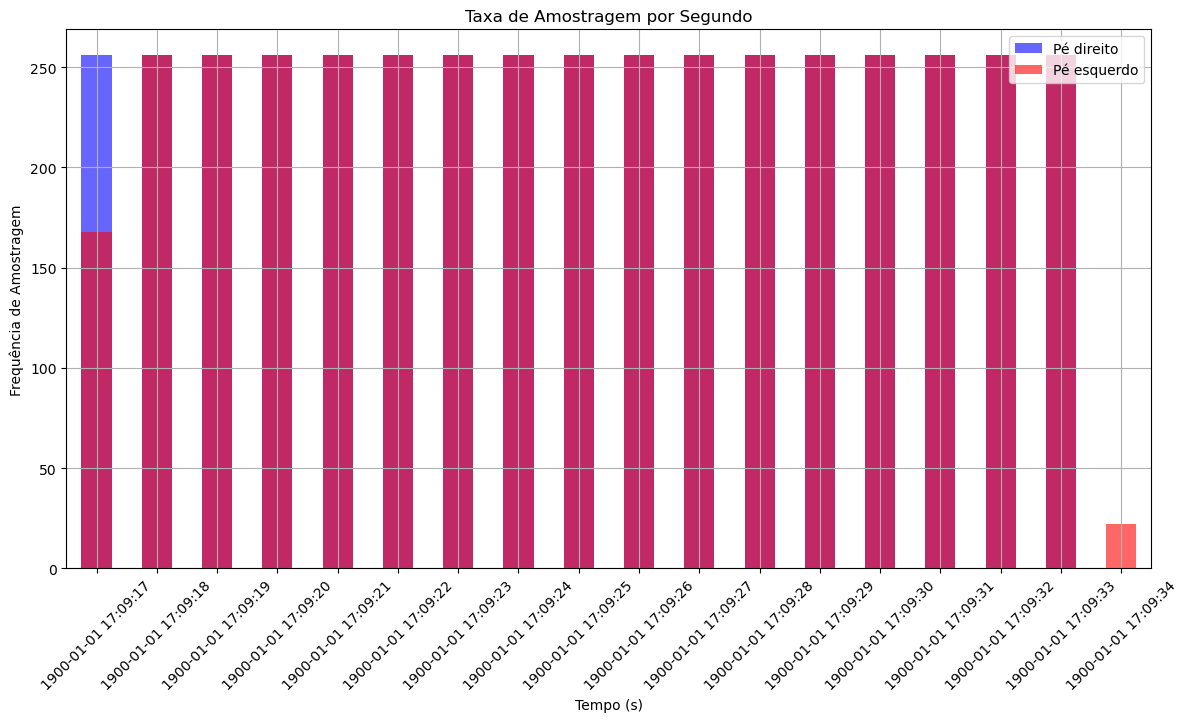

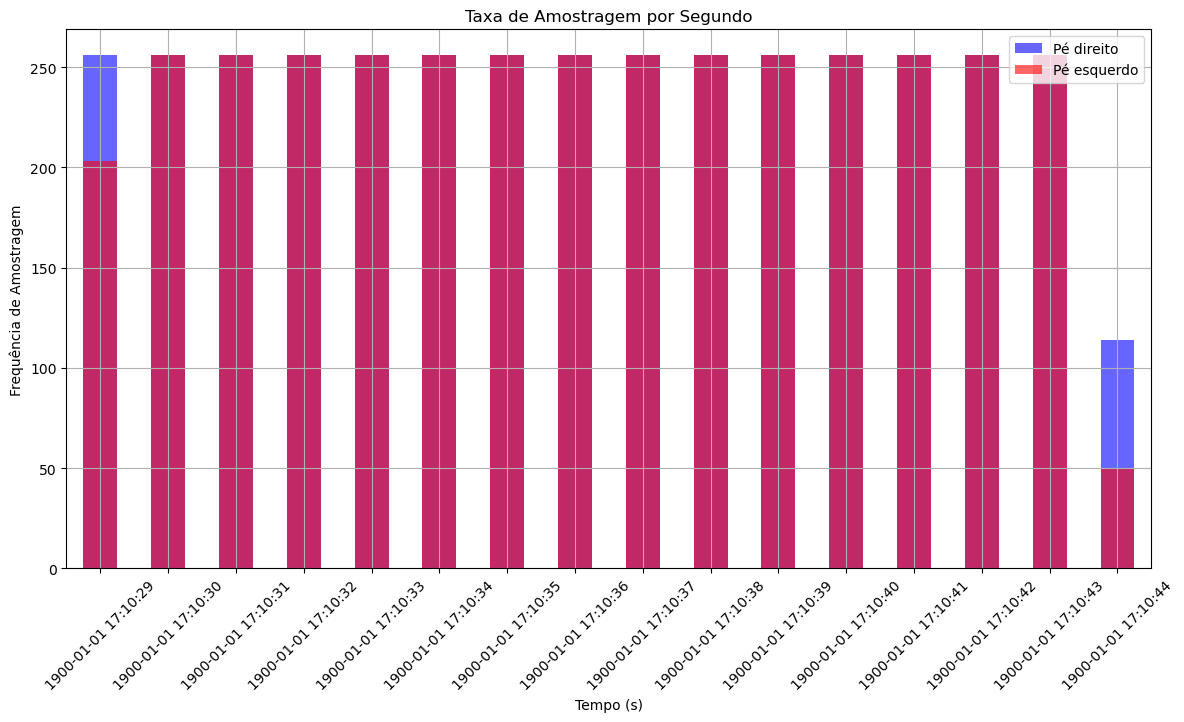

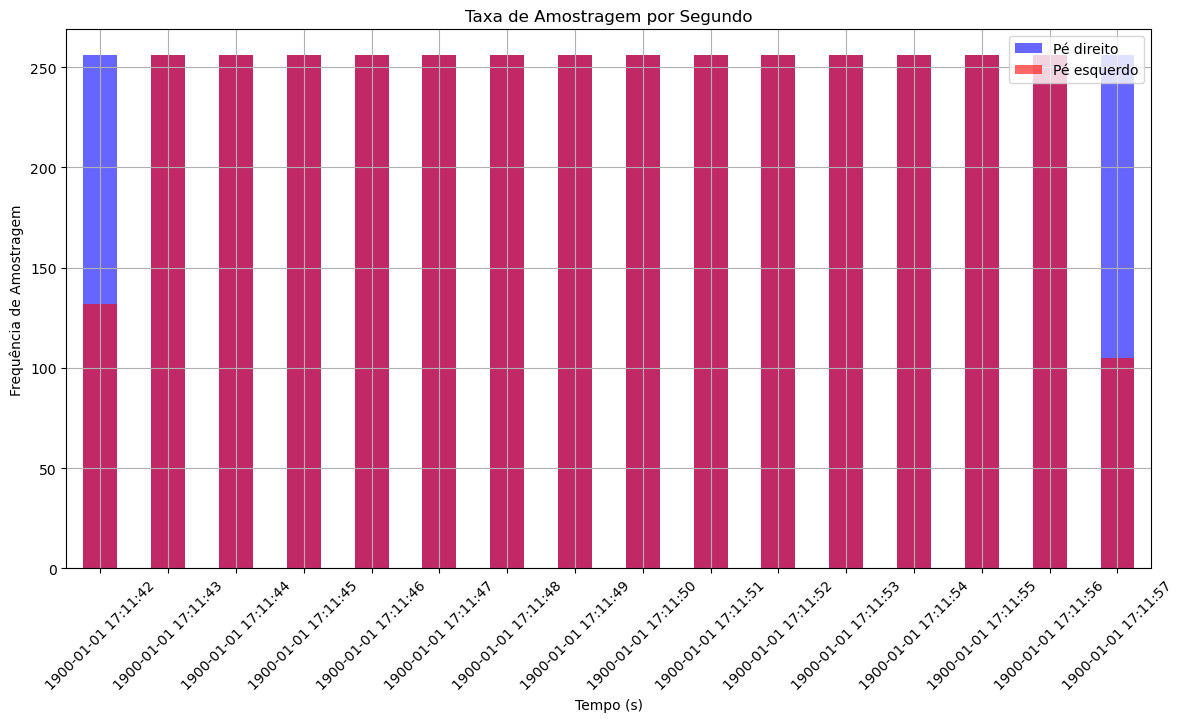

In [35]:
for right_file, left_file in zip(right_foot_files, left_foot_files):
    resampled_right = normalize_sampling_rate(right_file)
    resampled_left = normalize_sampling_rate(left_file, sep=';')
    new_rate_right = analyze_interpoled_sampling_rate(resampled_right)
    new_rate_left = analyze_interpoled_sampling_rate(resampled_left)
    plot_sampling_rate2(new_rate_right, new_rate_left)